In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1.1 Generate a 1000 x 1 vector of random samples from Normal distribution  N(5, 3), i.e., with a mean value 5 and standard deviation 3. Save the vector to a variable Data. 

In [236]:
mu = 5
sigma = 3
signal = np.random.normal(mu, sigma, 1000)
#signal=signal.reshape(1000,1)

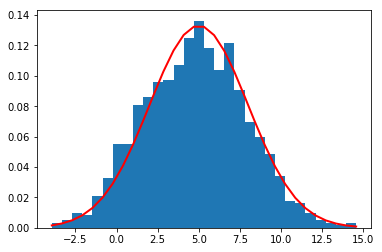

In [237]:
count, bins, ignored = plt.hist(signal, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
linewidth=2, color='r')
plt.show()

## 1.2 Generate a 1000 x 1 vector of random samples from Normal distribution N(0, 2), i.e., with a zero mean and standard deviation 2. Save the vector to variable Noise. 

In [238]:
noise_mu = 0
noise_sigma = 2
noise = np.random.normal(noise_mu, noise_sigma, 1000)
#noise=noise.reshape(1000,1)

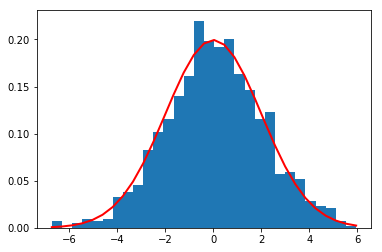

In [239]:
count, bins, ignored = plt.hist(noise, 30, normed=True)
plt.plot(bins, 1/(noise_sigma * np.sqrt(2 * np.pi)) *
np.exp( - (bins - noise_mu)**2 / (2 * noise_sigma**2) ),
linewidth=2, color='r')
plt.show()

## 1.3 Plot the variables Data and Noise on the same figure (with different colors).

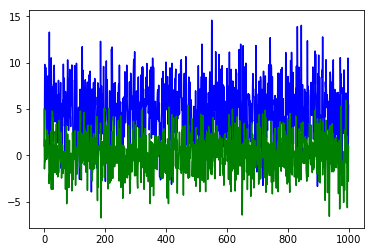

In [240]:
fig = plt.gcf() #get current figure
plt.plot(signal, 'b')
plt.plot(noise, 'g')
plt.show()

## 1.4 Save the figure to file EX1.png, and both variables Data and Noise to file: EX1.mat

In [241]:
fig.savefig("ex1.png") #after plt.show a new figure is created so save the current figure before
np.save("signal_data.npy", signal)
np.save("noise_data.npy", noise) # to load np.load("noise_data.npy")

## 1.5 As shown in class, learn how FFT works in MATLAB or any other software, run fft on the the signal generated in the above steps, and plot the resp graphs

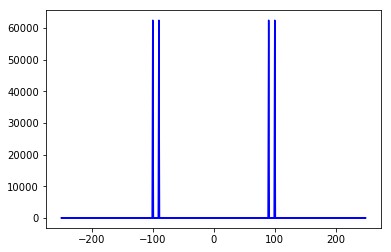

In [242]:
N = 500 #samples
t = np.arange(N)
m = 4
nu = float(m)/N #sample spacing
s = np.sin(50*np.pi*nu*t) + np.sin(45*np.pi*nu*t)
sft = np.fft.fft(s)
s_freq = np.fft.fftfreq(N)
plt.plot(s_freq*len(s_freq), sft.real**2 + sft.imag**2, 'b')
#plt.plot(s_freq, np.angle(sp), 'g')
plt.show()

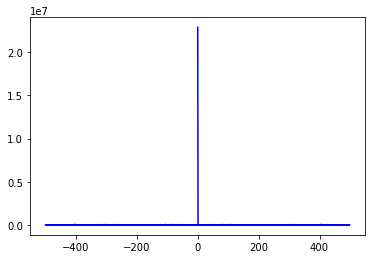

In [243]:
sp = np.fft.fft(signal)
freq = np.fft.fftfreq(len(signal))
#plt.plot(freq, sp.real, 'b')
plt.plot(freq*len(freq), (sp.real**2) + (sp.imag**2), 'b')
#plt.plot(freq, sp.imag, 'g')
plt.show()

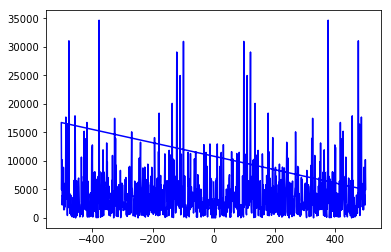

In [244]:
sp = np.fft.fft(noise)
freq = np.fft.fftfreq(len(noise))
#plt.plot(freq, sp.real, 'b')
#plt.plot(freq, sp.imag, 'g')
plt.plot(freq*len(freq), sp.real**2 + sp.imag**2, 'b')
plt.show()

## 1.6 Explain in one or two lines what the results of FFT show
    FFT response will give us the strength(amplitude) of all the frequency components that our signal has. So, basically weighted sum of these sinusoidal signals can create our signal.

## 2.1 Load variables Data and Noise from file

In [245]:
ex1_noise = np.load("noise_data.npy")
ex1_signal = np.load("signal_data.npy")
print(ex1_noise[:5])
print(ex1_signal[:5])

[ 4.97399493 -1.45349502 -0.32882911 -0.65853206  0.60598181]
[ 1.01883512  2.25080834  9.79825333  7.45712815  5.00159478]


## 2.2 Iterate through Data, calculating running mean and standard deviation of 100 most recent samples. Plot the progress of iterative mean and standard deviation. 

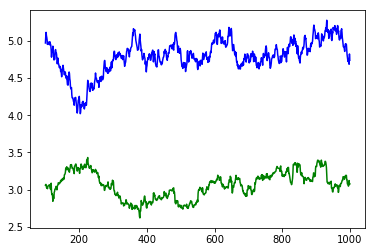

In [246]:
s_mean = []
s_sd = []
window = 100
for i in range(len(ex1_signal)-window):
    s_mean.append(ex1_signal[i:i+window].mean())
    s_sd.append(np.std(ex1_signal[i:i+window]))
x = np.linspace(window, len(ex1_signal), len(ex1_signal)-window)
plt.plot(x, s_mean, 'b')
plt.plot(x, s_sd, 'g')
plt.show()

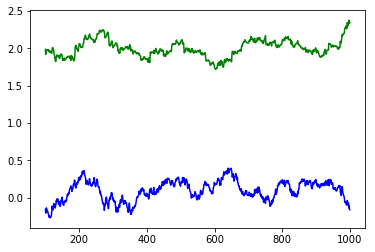

In [247]:
s_mean = []
s_sd = []
window = 100
for i in range(len(ex1_noise)-window):
    s_mean.append(ex1_noise[i:i+window].mean())
    s_sd.append(np.std(ex1_noise[i:i+window]))
x = np.linspace(window, len(ex1_noise), len(ex1_noise)-window)
plt.plot(x, s_mean, 'b')
plt.plot(x, s_sd, 'g')
plt.show()

## 2.3 Adds Noise to Data to create a variable NoisyData, and recalculate running mean and standard deviation for NoisyData as above.  

In [248]:
noisy_data = ex1_signal + ex1_noise
s_mean = []
s_sd = []
window = 100
for i in range(len(noisy_data)-window):
    s_mean.append(noisy_data[i:i+window].mean())
    s_sd.append(np.std(noisy_data[i:i+window]))

## 2.4 Again plot the iterative mean and standard deviation.

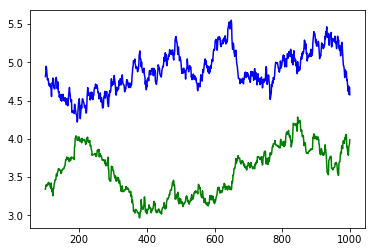

In [249]:
x = np.linspace(window, len(noisy_data), len(noisy_data)-window)
plt.plot(x, s_mean, 'b')
plt.plot(x, s_sd, 'g')
plt.show()

## 2.5 What do you observe from plots of step 2.2) and 2.4)?
    Noisy data's mean apperas slightly more unstable but similar to the signal's mean. And the standard deviation is higher than signal's. 

## 3. Create a function to count peaks

In [250]:
#v = np.array([int(x) for x in input().split()])
def func1(v):
    count = 0
    for x in v:
        if x>(v.mean()+2*np.std(v)):
            count=count+1
    return count

In [251]:
func1(ex1_signal)

22

In [252]:
def func2(v,dist):
    vb = v>v.mean()+2*np.std(v)
    count = 0
    #for i in range(dist,len(v)-2*dist):
    #    if vb[i]:
    #        if sum(vb[i-dist:i+dist])==1:
    #            count=count+1
    for i in range(len(v)):
        if vb[i]:
            if i<dist:
                if sum(vb[:i+dist])==1:
                    count=count+1
            elif i>(len(v)-dist):
                if sum(vb[i-dist:])==1:
                    count=count+1
            else:
                if sum(vb[i-dist:i+dist])==1:
                    count=count+1
    return count

In [253]:
func2(ex1_signal, 25)

8

## 4. Familiarize yourself with the Android Sensor API found at:

    Most Android-powered devices have built-in sensors that measure motion, orientation, and various environmental conditions. Two types of sensors hardware based and software based. Hardware-based sensors are physical components built into a handset or tablet device, example, accelometer. Software-based sensors derive their data from one or more of the hardware-based sensors and are sometimes called virtual sensors or synthetic sensors, example, linear acceleration sensor.
    android.hardware has a sensor framework which we will use. Main classes are
    SensorManager
        to create an instance of the sensor service. This class provides various methods for accessing and listing sensors, registering and unregistering sensor event listeners, and acquiring orientation information.
    Sensor
        to create an instance of a specific sensor. This class provides various methods that let you determine a sensor's capabilities.
    SensorEvent
        to create a sensor event object, which provides information about a sensor event.
    SensorEventListener
        to create two callback methods(?) that receive notifications (sensor events) when sensor values change or when sensor accuracy changes.
    Sensor types available:
    1. Motion Sensors
        gravity, linear acceleration, rotation vector, significant motion, step counter, step detector sensors, accelometer, gyroscope
    2. Position Sensors
        geomagnetic field sensor and proximity sensor
    3. Environment Sensors
        relative ambient humidity, illuminance, ambient pressure, and ambient temperature

In [254]:
import scipy.io
mat = scipy.io.loadmat('Ex4_Sensors.mat')

In [255]:
mat

{'Sensors': array([[ (array([[  1.41604585e+09,   1.80000000e+01,   0.00000000e+00,
           6.13710594e+00],
        [  1.41604585e+09,   1.80000000e+01,   0.00000000e+00,
           3.63122034e+00],
        [  1.41604586e+09,   2.20000000e+01,   0.00000000e+00,
           8.06553364e+00],
        ..., 
        [  1.41606042e+09,   1.80000000e+01,   1.14280355e+00,
           4.76536989e+00],
        [  1.41606042e+09,   1.90000000e+01,   1.66012049e+00,
           9.30064583e+00],
        [  1.41606042e+09,   1.90000000e+01,   1.76638043e+00,
           8.75471687e+00]]), array([[  1.41604582e+09,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   8.10000000e-01],
        [  1.41604583e+09,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   8.10000000e-01],
        [  1.41604583e+09,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   8.10000000e-01],
        ..., 
        [  1.41606041e+09,   0.00000000e+00,   0.00000000e+00,
           8.0

In [256]:
mat.keys()

dict_keys(['__header__', '__version__', 'Sensors', '__globals__'])

In [257]:
mat['Sensors'] 
# fields of the sensor structure are: 'GPS', 'PhoneState', 'GT', 'Accelerometer', 'Gravity', 'Gyroscope', 'LAccelerometer'

array([[ (array([[  1.41604585e+09,   1.80000000e+01,   0.00000000e+00,
          6.13710594e+00],
       [  1.41604585e+09,   1.80000000e+01,   0.00000000e+00,
          3.63122034e+00],
       [  1.41604586e+09,   2.20000000e+01,   0.00000000e+00,
          8.06553364e+00],
       ..., 
       [  1.41606042e+09,   1.80000000e+01,   1.14280355e+00,
          4.76536989e+00],
       [  1.41606042e+09,   1.90000000e+01,   1.66012049e+00,
          9.30064583e+00],
       [  1.41606042e+09,   1.90000000e+01,   1.76638043e+00,
          8.75471687e+00]]), array([[  1.41604582e+09,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   8.10000000e-01],
       [  1.41604583e+09,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   8.10000000e-01],
       [  1.41604583e+09,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   8.10000000e-01],
       ..., 
       [  1.41606041e+09,   0.00000000e+00,   0.00000000e+00,
          8.00000000e+00,   6.40000000e-01],


In [258]:
sensor_struct = mat['Sensors']
sensor_struct

array([[ (array([[  1.41604585e+09,   1.80000000e+01,   0.00000000e+00,
          6.13710594e+00],
       [  1.41604585e+09,   1.80000000e+01,   0.00000000e+00,
          3.63122034e+00],
       [  1.41604586e+09,   2.20000000e+01,   0.00000000e+00,
          8.06553364e+00],
       ..., 
       [  1.41606042e+09,   1.80000000e+01,   1.14280355e+00,
          4.76536989e+00],
       [  1.41606042e+09,   1.90000000e+01,   1.66012049e+00,
          9.30064583e+00],
       [  1.41606042e+09,   1.90000000e+01,   1.76638043e+00,
          8.75471687e+00]]), array([[  1.41604582e+09,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   8.10000000e-01],
       [  1.41604583e+09,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   8.10000000e-01],
       [  1.41604583e+09,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   8.10000000e-01],
       ..., 
       [  1.41606041e+09,   0.00000000e+00,   0.00000000e+00,
          8.00000000e+00,   6.40000000e-01],


In [259]:
struct_vals = sensor_struct[0,0]
struct_vals.dtype

dtype([('GPS', 'O'), ('PhoneState', 'O'), ('GT', 'O'), ('Accelerometer', 'O'), ('Gravity', 'O'), ('Gyroscope', 'O'), ('LAccelerometer', 'O')])

In [260]:
cols = ['GPS', 'PhoneState', 'GT', 'Accelerometer', 'Gravity', 'Gyroscope', 'LAccelerometer']
for i in cols:
    print(i + ": " + str(struct_vals[i].shape) + ": " + str(struct_vals[i].dtype))
for i in cols:
    print(i)
    print(struct_vals[i][0])

GPS: (3576, 4): float64
PhoneState: (808, 5): float64
GT: (1, 1): [('timeRange', 'O'), ('labels', 'O'), ('modes', 'O')]
Accelerometer: (204520, 4): float64
Gravity: (203776, 4): float64
Gyroscope: (203776, 4): float64
LAccelerometer: (203392, 4): float64
GPS
[  1.41604585e+09   1.80000000e+01   0.00000000e+00   6.13710594e+00]
PhoneState
[  1.41604582e+09   0.00000000e+00   0.00000000e+00   0.00000000e+00
   8.10000000e-01]
GT
[ (array([[  1.41604582e+09,   1.41604920e+09],
       [  1.41605975e+09,   1.41606042e+09]]), array([[array(['Walk'],
      dtype='<U4')],
       [array(['Walk'],
      dtype='<U4')]], dtype=object), array([[array([[ 3, 11]], dtype=uint8), array([[ 3, 11]], dtype=uint8)]], dtype=object))]
Accelerometer
[  1.41604581e+09  -2.55940200e+00  -8.13609600e+00   1.56161800e+00]
Gravity
[  1.41604582e+09  -1.94716000e-01   3.62636000e-01   9.79800800e+00]
Gyroscope
[  1.41604582e+09   1.23304000e-01   1.26500000e-01  -6.31170000e-02]
LAccelerometer
[  1.41604582e+09  -3

In [261]:
gt_vals = struct_vals['GT'][0,0]
gt_vals.dtype

dtype([('timeRange', 'O'), ('labels', 'O'), ('modes', 'O')])

In [262]:
gt_cols = ['timeRange', 'labels', 'modes']
for i in gt_cols:
    print(i + ": " + str(gt_vals[i].shape) + ": " + str(gt_vals[i].dtype))
for i in gt_cols:
    print(i)
    print(gt_vals[i][0])

timeRange: (2, 2): float64
labels: (2, 1): object
modes: (1, 2): object
timeRange
[  1.41604582e+09   1.41604920e+09]
labels
[array(['Walk'],
      dtype='<U4')]
modes
[array([[ 3, 11]], dtype=uint8) array([[ 3, 11]], dtype=uint8)]
